In [61]:
# Installing packages 

import pandas as pd 
import os 
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Working Directory 
os.chdir("/Users/rachel/Desktop/DSA3101/dataset")

In [62]:
# Loading dataset 
df = pd.read_csv("cleaned main dataset.csv",delimiter=",")
df.head()

,customer id,age,age group,gender,income/month,account balance,loyalty score,education level,type of campaign(s),Facebook,...,job grouped_retired,job grouped_self employed/entrepreneur,job grouped_student,job grouped_unemployed,job grouped_unknown,job grouped_white collar,marital_married,marital_single,has customer bought product,has customer churned
0,1,67,4,1,12223,7018,721,1,"['Instagram', 'Twitter']",0,...,0,0,0,0,0,1,1,0,0,0
1,2,26,0,0,11316,927,700,3,"['Twitter', 'Instagram', 'Email']",0,...,0,0,0,0,0,0,0,1,1,0
2,3,67,4,1,4493,8729,911,2,"['Facebook', 'Instagram', 'Twitter']",1,...,0,1,0,0,0,0,1,0,0,0
3,4,52,3,0,14545,1556,291,0,"['Instagram', 'Email']",0,...,0,0,0,0,0,0,1,0,1,1
4,5,45,2,0,12496,6967,487,3,"['Instagram', 'Email']",0,...,0,0,0,0,1,0,0,1,1,1


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   customer id                             20000 non-null  int64  
 1   age                                     20000 non-null  int64  
 2   age group                               20000 non-null  int64  
 3   gender                                  20000 non-null  int64  
 4   income/month                            20000 non-null  int64  
 5   account balance                         20000 non-null  int64  
 6   loyalty score                           20000 non-null  int64  
 7   education level                         20000 non-null  int64  
 8   type of campaign(s)                     20000 non-null  object 
 9   Facebook                                20000 non-null  int64  
 10  Twitter                                 20000 non-null  in

### **Customer Segmentation**
##### - **Demographics**: Age, gender, income, education, marital status, job type
##### - **Banking behavior**: Account balance, loyalty score, withdrawals, deposits, net transactions, transaction count
##### - **Marketing engagement**: Social media campaign interactions (Facebook, Twitter, Instagram, Email)
##### - **Customer outcomes**: Whether they bought a product, churned, or responded to past campaigns

### **K Means Clustering**

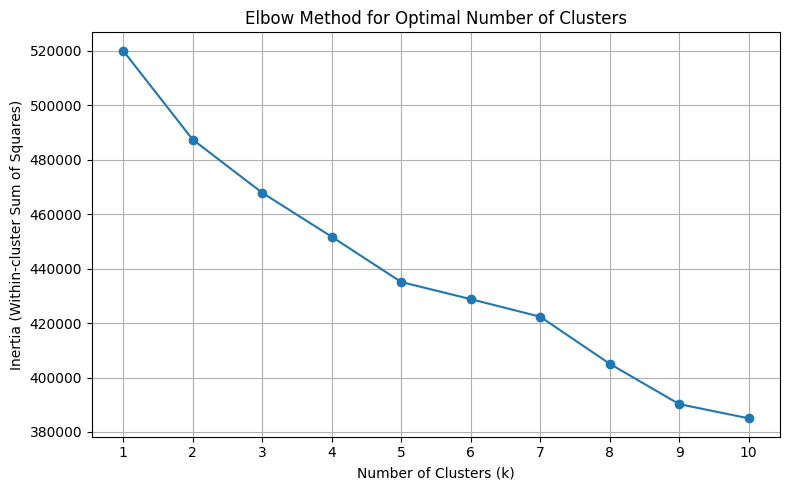

In [64]:
# Re-import necessary libraries after environment reset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = [
    'age', 'age group', 'gender', 'income/month', 'account balance',
    'loyalty score', 'education level', 'Facebook', 'Twitter', 'Email',
    'Instagram', 'prev campaign success', 'total_withdrawals',
    'total_deposits', 'net_transaction', 'transaction_count',
    'housing', 'loan', 'job grouped_retired', 'job grouped_self employed/entrepreneur',
    'job grouped_student', 'job grouped_unemployed', 'job grouped_unknown',
    'job grouped_white collar', 'marital_married', 'marital_single'
]

# Drop rows with missing values
df_cluster = df[cluster_features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Elbow Method to determine optimal number of clusters
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.xticks(cluster_range)
plt.grid(True)
plt.tight_layout()
plt.show()

Based on graph, taking the best number of clusters to be 4 and profiling them 

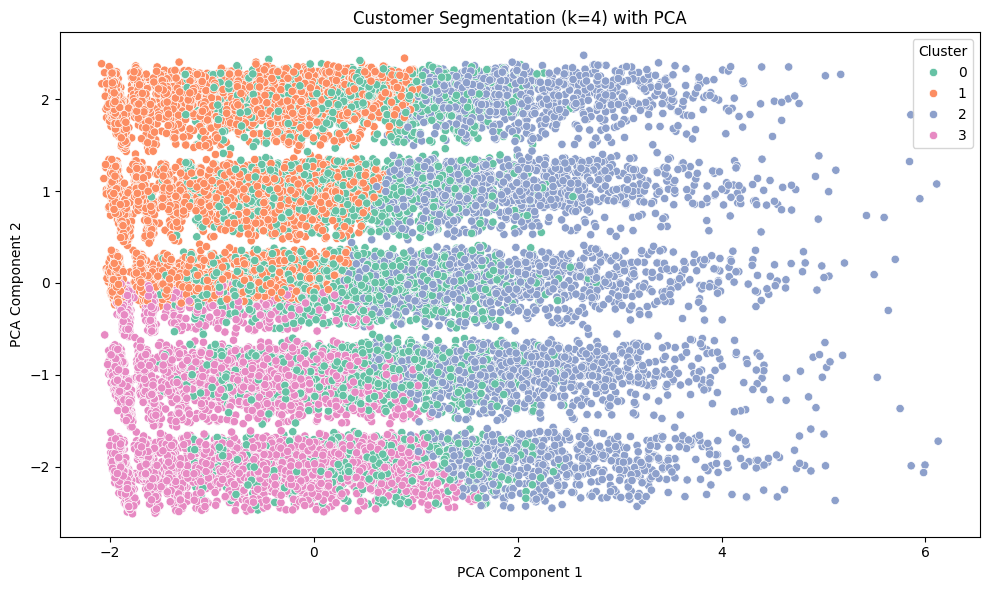

Cluster Profile (k=4):


,age,age group,gender,income/month,account balance,loyalty score,education level,Facebook,Twitter,Email,...,job grouped_retired,job grouped_self employed/entrepreneur,job grouped_student,job grouped_unemployed,job grouped_unknown,job grouped_white collar,marital_married,marital_single,PCA1,PCA2
Cluster,,,,,,,,,,,,,,,,,,,,,
0,45.64,2.10,0.53,9014.71,5057.20,500.67,1.51,0.67,0.67,0.50,...,0.04,0.06,0.00,0.02,0.01,0.41,0.61,0.25,0.38,0.10
1,56.32,3.17,0.50,8927.05,5111.65,494.24,1.51,0.67,0.66,0.50,...,0.04,0.08,0.01,0.03,0.01,0.39,0.73,0.16,-1.06,1.16
2,45.18,2.06,0.49,9112.06,5009.02,494.87,1.51,0.67,0.67,0.47,...,0.04,0.06,0.01,0.02,0.01,0.40,0.64,0.24,2.09,0.07
3,31.02,0.64,0.51,9079.43,5069.59,505.90,1.49,0.67,0.68,0.50,...,0.04,0.07,0.01,0.02,0.01,0.40,0.55,0.32,-0.89,-1.42


In [65]:
# Re-import necessary libraries after code reset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = [
    'age', 'age group', 'gender', 'income/month', 'account balance',
    'loyalty score', 'education level', 'Facebook', 'Twitter', 'Email',
    'Instagram', 'prev campaign success', 'total_withdrawals',
    'total_deposits', 'net_transaction', 'transaction_count',
    'housing', 'loan', 'job grouped_retired', 'job grouped_self employed/entrepreneur',
    'job grouped_student', 'job grouped_unemployed', 'job grouped_unknown',
    'job grouped_white collar', 'marital_married', 'marital_single'
]

# Drop missing values
df_cluster = df[cluster_features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Run KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels and PCA components
df_cluster['Cluster'] = clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

# Save the final DataFrame as df_k4.csv
df_cluster.to_csv("df_k4.csv", index=False)

# Plot PCA clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation (k=4) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Cluster profiling: mean values of features for each cluster
cluster_profile = df_cluster.groupby('Cluster').mean(numeric_only=True).round(2)

# Display the cluster profile
print("Cluster Profile (k=4):")
cluster_profile

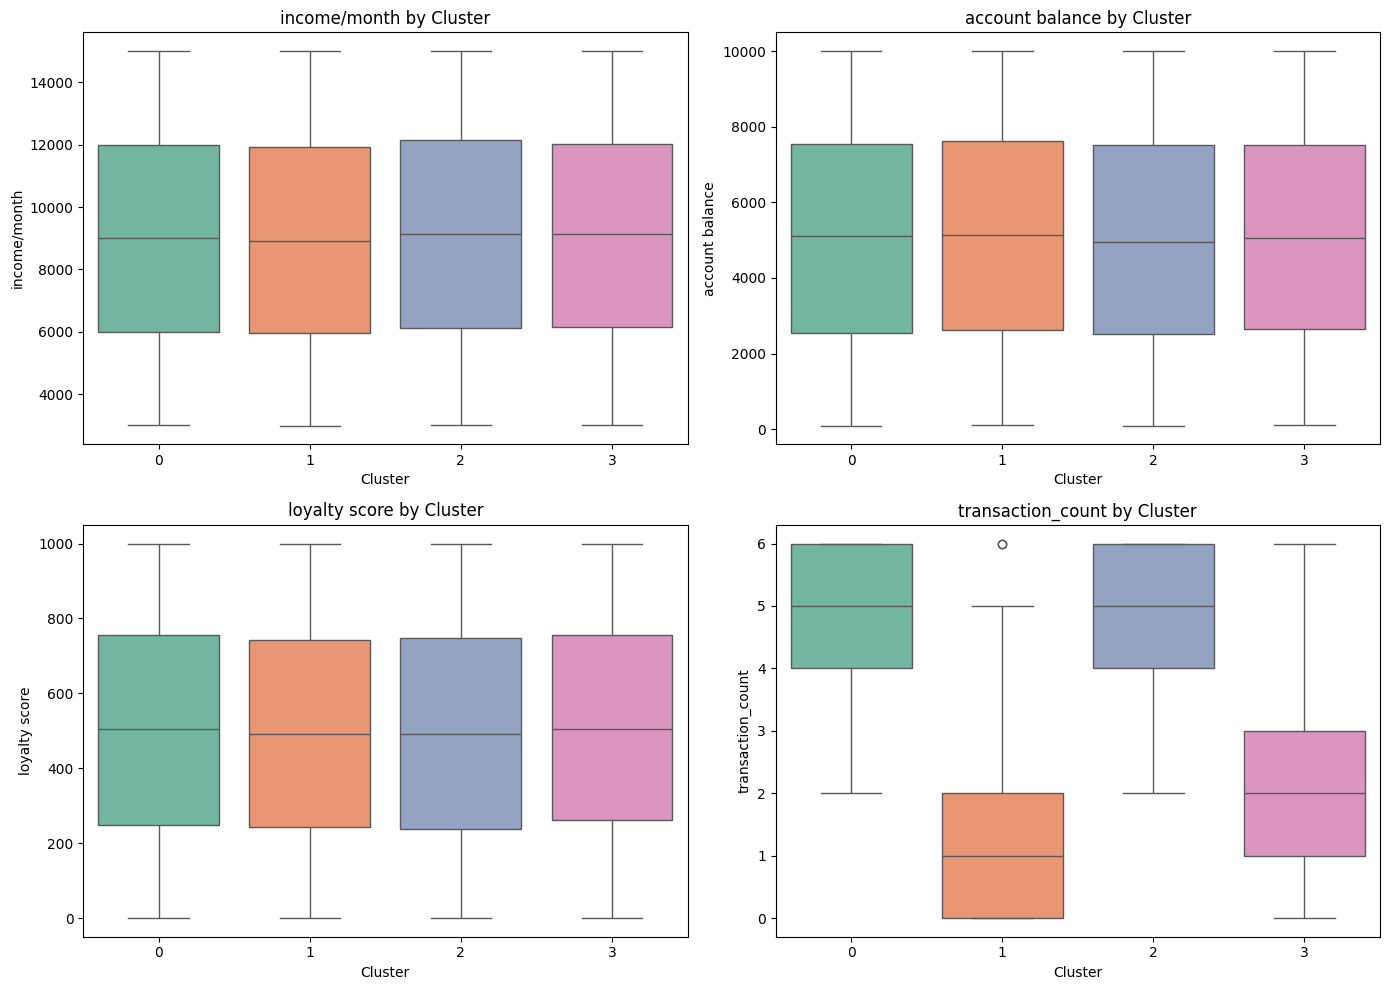

{0: 'low to mid income, lower account balance, loyal customers, frequent users',
 1: 'low to mid income, good account balance, low loyalty, less active users',
 2: 'high income, lower account balance, low loyalty, frequent users',
 3: 'high income, good account balance, loyal customers, less active users'}

In [66]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = [
    'age', 'age group', 'gender', 'income/month', 'account balance',
    'loyalty score', 'education level', 'Facebook', 'Twitter', 'Email',
    'Instagram', 'prev campaign success', 'total_withdrawals',
    'total_deposits', 'net_transaction', 'transaction_count',
    'housing', 'loan', 'job grouped_retired', 'job grouped_self employed/entrepreneur',
    'job grouped_student', 'job grouped_unemployed', 'job grouped_unknown',
    'job grouped_white collar', 'marital_married', 'marital_single'
]

# Drop missing values
df_cluster = df[cluster_features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Run KMeans with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels and PCA components
df_cluster['Cluster'] = clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

# Profile clusters
cluster_profile = df_cluster.groupby('Cluster').mean(numeric_only=True).round(2)

# Create cluster descriptions
descriptions = {}
for i, row in cluster_profile.iterrows():
    desc = []
    if row['income/month'] > df_cluster['income/month'].mean():
        desc.append("high income")
    else:
        desc.append("low to mid income")
    
    if row['account balance'] > df_cluster['account balance'].mean():
        desc.append("good account balance")
    else:
        desc.append("lower account balance")
    
    if row['loyalty score'] > df_cluster['loyalty score'].mean():
        desc.append("loyal customers")
    else:
        desc.append("low loyalty")
    
    if row['transaction_count'] > df_cluster['transaction_count'].mean():
        desc.append("frequent users")
    else:
        desc.append("less active users")
    
    descriptions[i] = ", ".join(desc)

# Plot visual breakdowns
key_features = ['income/month', 'account balance', 'loyalty score', 'transaction_count']

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, feature in enumerate(key_features):
    sns.boxplot(data=df_cluster, x='Cluster', y=feature, hue='Cluster', ax=axs[i], palette='Set2', legend=False)
    axs[i].set_title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()

descriptions

If taking the number of clusters to be 5 and profiling them:

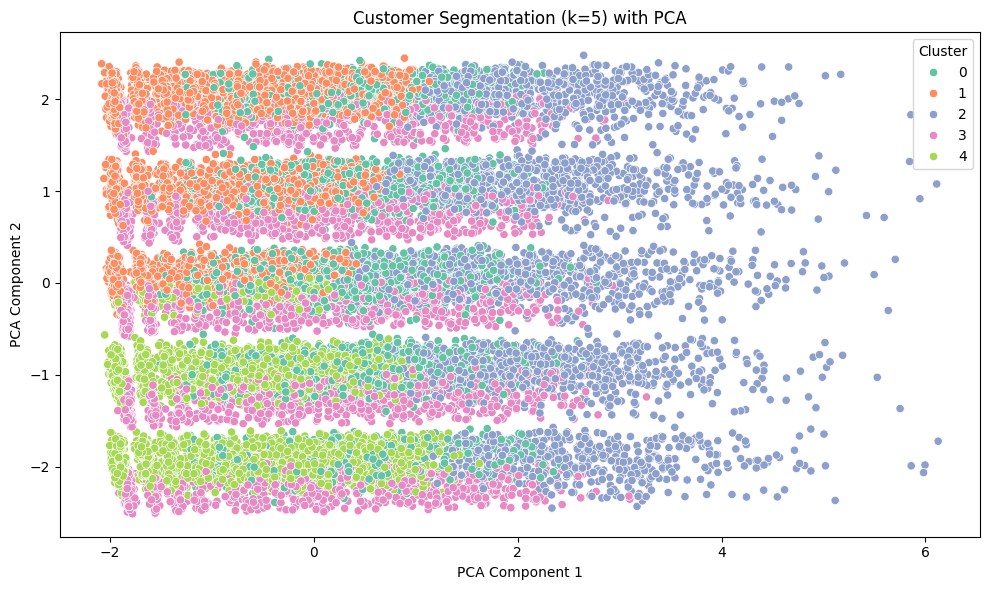

Cluster Profile (k=5):


,age,age group,gender,income/month,account balance,loyalty score,education level,Facebook,Twitter,Email,...,job grouped_retired,job grouped_self employed/entrepreneur,job grouped_student,job grouped_unemployed,job grouped_unknown,job grouped_white collar,marital_married,marital_single,PCA1,PCA2
Cluster,,,,,,,,,,,,,,,,,,,,,
0,45.68,2.11,0.53,8974.80,5044.60,507.29,1.50,0.67,0.67,0.49,...,0.05,0.07,0.00,0.02,0.01,0.39,0.79,0.03,0.39,0.17
1,56.34,3.16,0.49,8895.31,5113.66,492.82,1.52,0.66,0.65,0.50,...,0.04,0.08,0.00,0.03,0.01,0.39,0.85,0.00,-1.10,1.20
2,45.42,2.08,0.48,9102.36,4966.71,496.35,1.52,0.66,0.69,0.48,...,0.04,0.06,0.00,0.02,0.01,0.39,0.74,0.11,2.25,0.14
3,44.39,1.97,0.51,9060.65,5097.11,488.43,1.48,0.67,0.66,0.49,...,0.01,0.05,0.03,0.02,0.01,0.46,0.00,1.00,-0.18,-0.27
4,30.37,0.59,0.51,9126.93,5081.03,512.40,1.49,0.68,0.69,0.49,...,0.06,0.08,0.00,0.02,0.01,0.35,0.85,0.00,-0.84,-1.38


In [67]:
# Re-import necessary libraries after code reset
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = [
    'age', 'age group', 'gender', 'income/month', 'account balance',
    'loyalty score', 'education level', 'Facebook', 'Twitter', 'Email',
    'Instagram', 'prev campaign success', 'total_withdrawals',
    'total_deposits', 'net_transaction', 'transaction_count',
    'housing', 'loan', 'job grouped_retired', 'job grouped_self employed/entrepreneur',
    'job grouped_student', 'job grouped_unemployed', 'job grouped_unknown',
    'job grouped_white collar', 'marital_married', 'marital_single'
]

# Drop missing values
df_cluster = df[cluster_features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Run KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels and PCA components
df_cluster['Cluster'] = clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

# Save the final DataFrame as df_k5.csv
df_cluster.to_csv("df_k5.csv", index=False)

# Plot PCA clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation (k=5) with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

# Cluster profiling: mean values of features for each cluster
cluster_profile = df_cluster.groupby('Cluster').mean(numeric_only=True).round(2)

# Display the cluster profile
print("Cluster Profile (k=5):")
cluster_profile

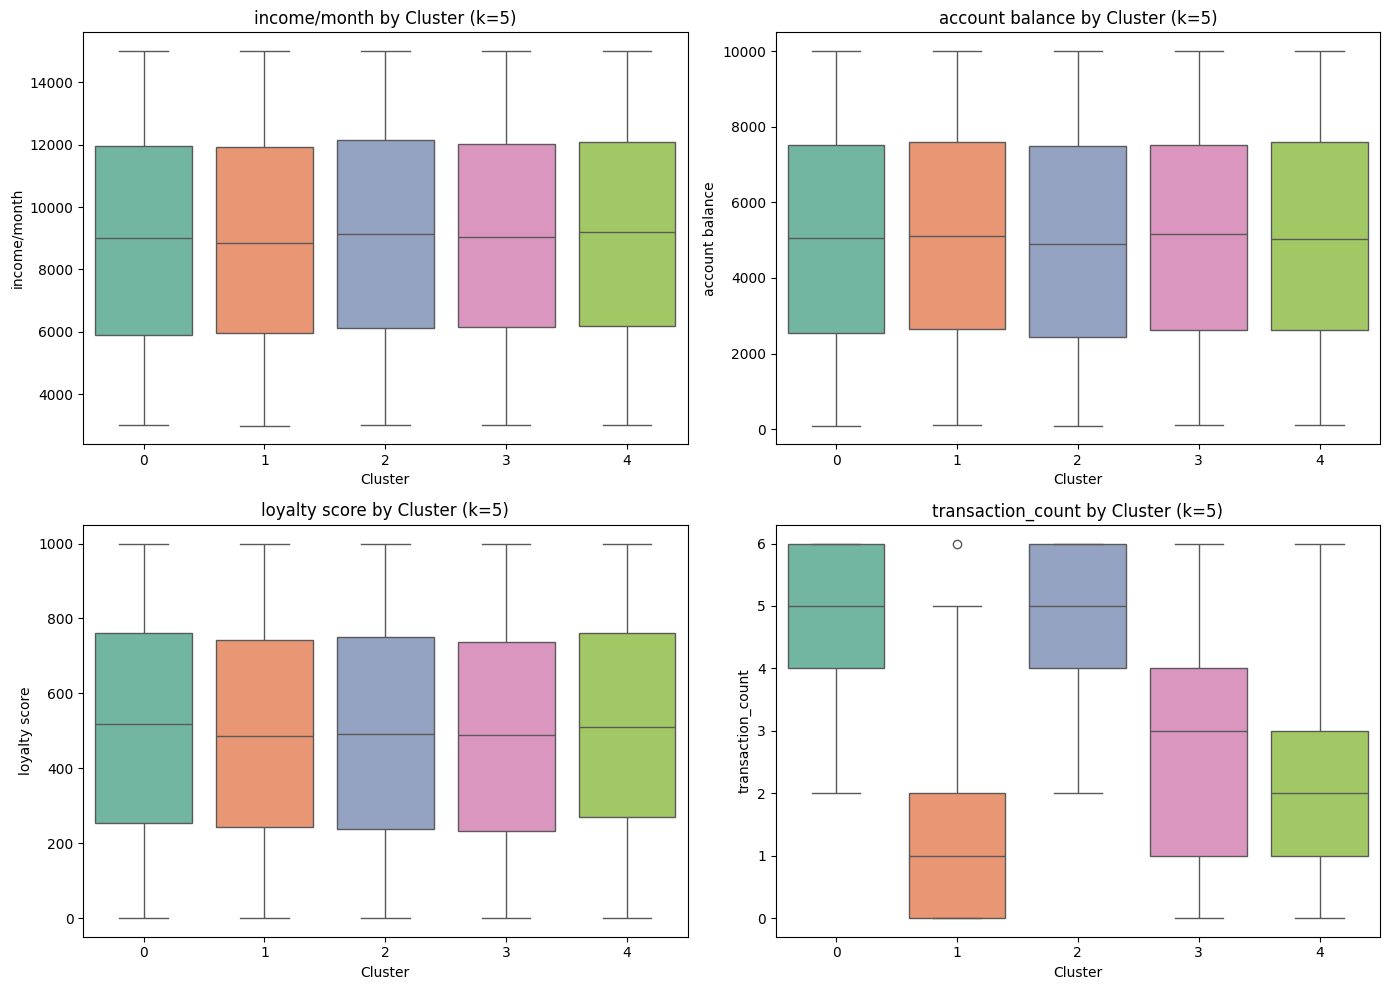

{0: 'low to mid income, lower account balance, loyal customers, frequent users',
 1: 'low to mid income, good account balance, low loyalty, less active users',
 2: 'high income, lower account balance, low loyalty, frequent users',
 3: 'high income, good account balance, low loyalty, less active users',
 4: 'high income, good account balance, loyal customers, less active users'}

In [68]:
# Re-import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Select features for clustering
cluster_features = [
    'age', 'age group', 'gender', 'income/month', 'account balance',
    'loyalty score', 'education level', 'Facebook', 'Twitter', 'Email',
    'Instagram', 'prev campaign success', 'total_withdrawals',
    'total_deposits', 'net_transaction', 'transaction_count',
    'housing', 'loan', 'job grouped_retired', 'job grouped_self employed/entrepreneur',
    'job grouped_student', 'job grouped_unemployed', 'job grouped_unknown',
    'job grouped_white collar', 'marital_married', 'marital_single'
]

# Drop missing values
df_cluster = df[cluster_features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# Run KMeans with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels and PCA components
df_cluster['Cluster'] = clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

# Profile clusters
cluster_profile = df_cluster.groupby('Cluster').mean(numeric_only=True).round(2)

# Create cluster descriptions for k=5
descriptions_k5 = {}
for i, row in cluster_profile.iterrows():
    desc = []
    if row['income/month'] > df_cluster['income/month'].mean():
        desc.append("high income")
    else:
        desc.append("low to mid income")
    
    if row['account balance'] > df_cluster['account balance'].mean():
        desc.append("good account balance")
    else:
        desc.append("lower account balance")
    
    if row['loyalty score'] > df_cluster['loyalty score'].mean():
        desc.append("loyal customers")
    else:
        desc.append("low loyalty")
    
    if row['transaction_count'] > df_cluster['transaction_count'].mean():
        desc.append("frequent users")
    else:
        desc.append("less active users")
    
    descriptions_k5[i] = ", ".join(desc)

# Plot boxplots for 5-cluster version
key_features = ['income/month', 'account balance', 'loyalty score', 'transaction_count']
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axs = axs.flatten()

for i, feature in enumerate(key_features):
    sns.boxplot(data=df_cluster, x='Cluster', y=feature, hue='Cluster', ax=axs[i], palette='Set2', legend=False)
    axs[i].set_title(f'{feature} by Cluster (k=5)')

plt.tight_layout()
plt.show()

descriptions_k5

Comparing K=4 vs K=5:

In [69]:
# Re-import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
cluster_features = [
    'age', 'age group', 'gender', 'income/month', 'account balance',
    'loyalty score', 'education level', 'Facebook', 'Twitter', 'Email',
    'Instagram', 'prev campaign success', 'total_withdrawals',
    'total_deposits', 'net_transaction', 'transaction_count',
    'housing', 'loan', 'job grouped_retired', 'job grouped_self employed/entrepreneur',
    'job grouped_student', 'job grouped_unemployed', 'job grouped_unknown',
    'job grouped_white collar', 'marital_married', 'marital_single'
]

# Drop missing values
df_cluster = df[cluster_features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# KMeans with k=4
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(X_scaled)
df_cluster['Cluster_4'] = clusters_4

# Profile for k=4
profile_k4 = df_cluster.groupby('Cluster_4')[['income/month', 'account balance', 'loyalty score', 'transaction_count']].mean().round(2)
profile_k4['Num Customers'] = df_cluster['Cluster_4'].value_counts().sort_index()
profile_k4.columns = [f"{col} (k=4)" for col in profile_k4.columns]

# KMeans with k=5
kmeans_5 = KMeans(n_clusters=5, random_state=42)
clusters_5 = kmeans_5.fit_predict(X_scaled)
df_cluster['Cluster_5'] = clusters_5

# Profile for k=5
profile_k5 = df_cluster.groupby('Cluster_5')[['income/month', 'account balance', 'loyalty score', 'transaction_count']].mean().round(2)
profile_k5['Num Customers'] = df_cluster['Cluster_5'].value_counts().sort_index()
profile_k5.columns = [f"{col} (k=5)" for col in profile_k5.columns]

# Combine both profiles
comparison_df = pd.concat([profile_k4, profile_k5], axis=1)

# Display updated comparison
print("Customer Segmentation Comparison (K=4 vs K=5):")
comparison_df

Customer Segmentation Comparison (K=4 vs K=5):


,income/month (k=4),account balance (k=4),loyalty score (k=4),transaction_count (k=4),Num Customers (k=4),income/month (k=5),account balance (k=5),loyalty score (k=5),transaction_count (k=5),Num Customers (k=5)
0,9014.71,5057.20,500.67,4.86,4330.0,8974.80,5044.60,507.29,4.89,3419
1,8927.05,5111.65,494.24,1.52,5890.0,8895.31,5113.66,492.82,1.48,4689
2,9112.06,5009.02,494.87,4.75,4459.0,9102.36,4966.71,496.35,4.83,3529
3,9079.43,5069.59,505.90,1.71,5321.0,9060.65,5097.11,488.43,2.79,4366
4,NaN,NaN,NaN,NaN,NaN,9126.93,5081.03,512.40,1.84,3997


**Customer Segmentation Analysis**: K=4 vs K=5 Clusters
To uncover meaningful customer groups for targeted marketing, we applied K-Means clustering with k=4 and k=5 on a set of behavioral and financial features, including income, account balance, loyalty score, and transaction activity.

**K=4 Cluster Model**:
The 4-cluster model produced distinct and well-separated segments. Each cluster showed clear differences in customer attributes:

One group represented high-income, loyal, and frequent users, likely high-value customers.
Another comprised low-income, low-loyalty, and less active users, possibly disengaged or low-priority targets.
The simplicity and clarity of this model make it effective for broad strategic targeting, especially for campaigns that require easily interpretable segment labels.

**K=5 Cluster Model**:
The 5-cluster model offered finer granularity, particularly within the high-income segment:

The previous high-income group was split into two sub-segments: one with high loyalty and balance, and another with lower balance and more frequent activity. While this added detail could be valuable for hyper-targeted strategies (e.g., premium service upselling or churn prevention), one or two clusters showed overlapping profiles, suggesting potential redundancy.

In [71]:
# Use the correct column names (with k=4 suffix)
descriptions_k4 = {}

income_avg = df_cluster['income/month'].mean()
balance_avg = df_cluster['account balance'].mean()
loyalty_avg = df_cluster['loyalty score'].mean()
txn_avg = df_cluster['transaction_count'].mean()

for i, row in profile_k4.iterrows():
    desc = []
    if row['income/month (k=4)'] > income_avg:
        desc.append("high income")
    else:
        desc.append("low to mid income")
    
    if row['account balance (k=4)'] > balance_avg:
        desc.append("good account balance")
    else:
        desc.append("lower account balance")
    
    if row['loyalty score (k=4)'] > loyalty_avg:
        desc.append("loyal customers")
    else:
        desc.append("low loyalty")
    
    if row['transaction_count (k=4)'] > txn_avg:
        desc.append("frequent users")
    else:
        desc.append("less active users")
    
    descriptions_k4[i] = ", ".join(desc)

# Add description column and save
profile_k4['Description'] = profile_k4.index.map(descriptions_k4)
profile_k4.to_csv("cluster_profile_k4.csv")

In [72]:
# Calculate global means from the original df_cluster
income_avg = df_cluster['income/month'].mean()
balance_avg = df_cluster['account balance'].mean()
loyalty_avg = df_cluster['loyalty score'].mean()
txn_avg = df_cluster['transaction_count'].mean()

# Create descriptions for each cluster in profile_k5
descriptions_k5 = {}

for i, row in profile_k5.iterrows():
    desc = []
    if row['income/month (k=5)'] > income_avg:
        desc.append("high income")
    else:
        desc.append("low to mid income")
    
    if row['account balance (k=5)'] > balance_avg:
        desc.append("good account balance")
    else:
        desc.append("lower account balance")
    
    if row['loyalty score (k=5)'] > loyalty_avg:
        desc.append("loyal customers")
    else:
        desc.append("low loyalty")
    
    if row['transaction_count (k=5)'] > txn_avg:
        desc.append("frequent users")
    else:
        desc.append("less active users")
    
    descriptions_k5[i] = ", ".join(desc)

# Add the description column to the profile
profile_k5['Description'] = profile_k5.index.map(descriptions_k5)

# Save to CSV
profile_k5.to_csv("cluster_profile_k5.csv")